
# Applied Statistics
## Grainne Boyle


In [6]:
# I import the following libraries for various functionalities in my project:  

import math # Provides extensive mathematical functions.  
import itertools # Provides tools for creating iterators such as combinations() and permutations(). Helps you loop and combine things efficiently.  
import random # Used for generating random numbers and random selections 
import numpy as np # package for numerical computations and arrays
import matplotlib.pyplot as plt # Used for creating visualizations and plots
import seaborn as sns # Statistical data visualization library based on matplotlib
from scipy import stats # Used for statistical functions and tests
 

# Add some notes and links on your research of different import libraries and how you plan to use them in your project:


## Problem 1: Extending the Lady Tasting Tea

[Lady tasting tea](https://en.wikipedia.org/wiki/Lady_tasting_tea)
This project begins with a look at the lady tasting tea, a randomised experiment devised by Ronald Fisher. In the experiment, the lady is given eight cups of tea, four prepared by adding milk first and four by adding tea first. The lady's task is to correctly identify the four cups prepared by one method or the other. The null hypothesis is that the subject has no real ability to distinguish between the preparation method of the teas. The test statistic is a count of the number of successful attempts to select the four cups prepared by a given method. The distribution of possible number of successes, assuming the null hypothesis is true, can be computed using the number of combinations.

I used chatgpt to help format and render mathematical formulas in LaTex so that they display clearly in the markdown cells in this notebook. ​[LaTeX Math in Jupyter Documentation](https://jupyterbook.org/en/stable/content/math.html)

In the formula for combinations, 

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!},
$$

we choose $k$ objects from $n$, where $n$ is the total number of cups and $k$ is the number of cups with tea poured first.

In the original experiment, the number of possible ways to choose 4 cups out of 8 is:

$$
\binom{8}{4} = \frac{8!}{4!(8-4)!} = 70
$$

Since only one of these combinations is completely correct, the probability of identifying all 4 correctly by chance is:

$$
P = \frac{1}{\binom{8}{4}} = \frac{1}{70} \approx 0.0143
$$

This means that the lady has a 1.4% chance of guessing correctly.

## To do, add some notes to explain the calculation above and factorials and also to explain the null hypothesis from research.



We need to understand the null hypothesis . It is the idea that we assume to be true until evidence shows us that it is not. We can reject the null hypothesis when we can prove that something is true(or when the evidence is unlikely to have occured by chance). When you see something showing a statistically significant result, we really mean that there was enough evidence provided to reject a null hypothesis. Fisher set up the test so that if the lady's performance was significantly better than chance, we would reject the null hypothesis and conclude that she probably can distinguish the two preparation methods.
[NullHypothesis](https://www.youtube.com/watch?v=DAkJhY2zQ3c) - This video explains very clearly what the null hypothesis, statistical significance and p-value are.

In [7]:
# In the continuation of this experiment, suppose we have 12 cups of tea in total — 8 poured tea first and 4 poured milk first.

# Number of cups of tea in total
no_cups = 12

# Number of cups of tea with milk in first 
no_cups_milk_first = 4

# Number of cups of tea with tea in first 
no_cups_tea_first = 8

# Number of ways that we can select cups with tea in first from a total of 12 cups
ways = math.comb(no_cups, no_cups_tea_first)

# Show the result
ways



495

In the continuation of this experiment  — we see the results

where, $n = 12$ and $k = 8$.

The number of ways to choose 8 cups with the tea in first from 12 cups is calculated as:

$$
\binom{12}{8} = \frac{12!}{8!(12-8)!}
$$

Evaluating this gives:

$$
\binom{12}{8} = 495
$$

So, there are 495 different possible combinations of 8 cups with the tea in first among 12 cups in total. 

As the total number of cups grow, the number of possible combinations increases.

The probability of identifying all 8 cups with the tea in first cups is then:

$$
P = \frac{1}{\binom{12}{8}} = \frac{1}{495} \approx 0.0020
$$

This means that the lady has a 0.20% chance of guessing correctly.

Note that:
\[
\binom{12}{8} = \binom{12}{4} = 495
\]
because choosing which 8 cups are tea-first automatically determines
which 4 are milk-first (the remaining ones). The probabilities are the same either way.

## Add more notes on the binomial coefficent and factorials


In [8]:
# Using numPy I will use the random number generation capabilities to reiterate the experiment many times

# Number of cups of tea with tea in first 
n_tea = 8

# Number of cups of tea with milk in first 
n_milk = 4

# Number of simulations
n_simulations = 100000

# When generating random numbers for simulation, setting a seed allows you to obtain consistent results across different runs of the code. The seed()method is used to initialise the random number generator. By using the same seed value twice, you will get the same random number twice.
# # A note about the randomness of random number generation: they are pseudo-random, meaning the sequence of numbers generated is deterministic and will always be the same for the same seed.
# The seed value can be any integer. Here, I choose 42 as the seed value.Fun fact : the seed value 42 is often used as a reference to "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, where 42 is humorously described as the "Answer to the Ultimate Question of Life, the Universe, and Everything."
# [Random seed](https://www.w3schools.com/python/ref_random_seed.asp)
# [Random seeds and reproducibility](https://medium.com/data-science/random-seeds-and-reproducibility-933da79446e3)

# Create a function to simulate the lady's guessing process. 
def simulate_lady(n_tea, n_milk, n_simulations=100000, seed=42):
    '''Simulate the Lady Tasting Tea experiment.could
    The function uses NumPy to randomly shuffle the cups and randomly guess the probability
    of correctly identifying all tea-first cups by chance.
    Parameters:
    n_tea (int): Number of tea-first cups.
    n_milk (int): Number of milk-first cups.
    n_simulations (int): Number of simulations to run.
    seed (int, optional): Random seed for reproducibility.
    Returns:
    tuple: Simulated probability and exact probability of correct guesses.
    '''

    #Createa random number gererator
    rng = np.random.default_rng(seed)
    # Total number of cups
    n = n_tea + n_milk
    # Create an array representing the labels (1 = tea-first, 0 = milk-first).
    correct = np.array([1]*n_tea + [0]*n_milk)
    # Create a counter for correct matches
    correct_matches = 0
    # Run the simulation, this may take some time depending on the number of simulations
    for _ in range(n_simulations):
        # Randomly shuffle the cups so that you get a different order each time
        shuffled_correct = rng.permutation(correct)
        # Lady randomly guesses which n_tea cups are tea-first
        # Use an array of length n (or len(correct)) rather than zeros_like(n) which causes the IndexError
        guess = np.zeros(len(correct), dtype=int)
        guess[rng.choice(len(correct), size=n_tea, replace=False)] = 1
        # If her guesses exactly match the true shuffled order, count a success
        if np.array_equal(guess, shuffled_correct):
            correct_matches += 1
    # Calculate the probability AFTER all simulations
    simulated_probability = correct_matches / n_simulations
    exact_probability = 1 / math.comb(n, n_tea)  #  1 / comb(12, 8) 1 / comb(12, 4)
    return simulated_probability, exact_probability

# Run the simulation and print the results(12 cups: 8 tea-first, 4 milk-first)
simulated_prob, exact_prob = simulate_lady(8, 4, 100_000)
print(f"Simulated probability: {simulated_prob:.6f}")
print(f"Exact probability:     {exact_prob:.6f}")



Simulated probability: 0.002150
Exact probability:     0.002020


[DocStrings]( https://www.geeksforgeeks.org/python/python-docstrings/) – We use a `docstring` above in the python code. A `docstring` is a string literal placed at the beginning of a function, class, or module. In our case it  provides a description of what the function does. They can be accessed  later using `object.__doc__`

## Simulation Results

In the cell above, I used NumPY to simulate the Lady Testing Tea experiment many times in order to estimate the probability that the lady could correctly identify all the cups by chance.  
The simulation produced a probability of approximately .002060(0.2%) which matches the exact probability.002020(0.2%). If the lady had no real ability to tell the difference, the chance of her correctly identifying all 12 cups by guessing is about 1 in 495.  
A perfect result would be unlikely to occur by chance,  and it would be much rarer that in the 8-cup experiment.
By extending the experiment from 8 to 12 cups, the probability of guessing all cups by chance is reduced quite dramatically.


In [4]:


# If we want to compare the original experiment (8 cups: 4 tea-first, 4 milk-first) with the extended experiment (12 cups: 8 tea-first, 4 milk-first), we can create use the function created to simulate both scenarios and compare the results.



# We call the function using both scenarios and print the results.

simulated_prob_8, exact_prob_8 = simulate_lady(4, 4, 100_000)
simulated_prob_12, exact_prob_12 = simulate_lady(8, 4, 100_000)

# Calculate how many times higher the chance is in the original design

ratio = exact_prob_8 / exact_prob_12


# Print the results
print("\nThe estimated probability of correctly identifying all cups by chance is:")
print(f"Original 8 cups (4 tea-first, 4 milk-first): simulated = {simulated_prob_8:.6f}, exact = {exact_prob_8:.6f}")
print(f"Extended 12 cups (8 tea-first, 4 milk-first): simulated = {simulated_prob_12:.6f}, exact = {exact_prob_12:.6f}")
print(f"The chance of correctly identifying all cups by guessing is approximately {ratio:.2f} times higher in the original experiment than in the extended experiment.")
                                             

                    



#



The estimated probability of correctly identifying all cups by chance is:
Original 8 cups (4 tea-first, 4 milk-first): simulated = 0.015240, exact = 0.014286
Extended 12 cups (8 tea-first, 4 milk-first): simulated = 0.002150, exact = 0.002020
The chance of correctly identifying all cups by guessing is approximately 7.07 times higher in the original experiment than in the extended experiment.


## Comparison of the Experiments

In the original 8-cup experiment, the chance of correctly identifying all cups by guessing is about 1.43%, while in the 12-cup experiment it drops to 0.2%. This makes the extended experiment roughly seven times harder to succeed at by chance alone.

Under the null hypothesis, we assume the lady has no real ability to distinguish the two methods of preparing tea and that any correct identifications are due to chance. If this assumption were true, then the probability of her getting every cup correct would be 1.4% in the 8-cup test and only 0.2% in the 12-cup test.

The p-value represents the probability of observing a result at least this extreme if the null hypothesis were true.
In the extended design, this p-value is approximately 0.002, or 0.2%, which is below the common significance threshold of 0.05 (5%). The p-value threshold (usually 0.05) is the cutoff for saying something is “statistically significant.” Since the p-value is smaller than the standard 0.05 significance level, there is no reason to relax that threshold — the extended experiment itself gives stronger evidence against the null hypothesis.

Because the p-value in the 12-cup experiment is extremely small (0.002), the result would be very unlikely to occur if the lady were only guessing. This gives strong evidence against the null hypothesis and supports the conclusion that the lady can probably tell the difference between tea-first and milk-first cups.

[P-values](https://www.youtube.com/watch?v=vemZtEM63GY) - This you tube video describes what the p-value is and how something may be statistically significant.  As p values, get smaller, we increase our confidence in rejecting the null hypothesis. Any more than .05, we don’t have enough evidence to reject the null hypothesis.


 


## Problem 2: Normal Distribution

In this problem, we will examine how the standard deviation behaves using samples from a standard normal distribution. I will generate 10000 samples using Numpy, and each sample will contain 10 numbers. This will give many small samples so we can see how much the standard deviation varies from sample to sample. I will compute the standard deviation using two ways, using ddof = 0 and using ddof = 1. After computing these, we will plot the two histograms and compare how the two sets of values differ.

We need to understand a few things before we start.
 can i
[Standard Normal Distribution](https://www.geeksforgeeks.org/maths/standard-normal-distribution/). 
(https://www.statology.org/normal-distribution-vs-standard-normal-distribution/) Explains the difference between standard distribution and standard normal distribution.

A normal distribution is the most significant continuous probability distribution in statistics, it describes how many natural quantities tend to cluster around an average. A normal distribution is a smooth, symmetric bell-shaped curve and can have any mean $\mu$ and standard deviation $\sigma$. Most values are close to the average or mean, fewer values appear as you move away from the mean. For example, if we looked at the average height of females, where most are around an average height and fewer are very tall or very short. We could add other factors like nutrition and genetics but still it would tend to form a normal distribution.

A standard normal distribution is sometimes referred to as the Z-distribution. It is a specific type of normal distribution that has a mean of $\mu = 0$ and a standard deviation of $\sigma = 1$. It represents the distribution you obtain after converting values to z-scores. A z-score tells us how many standard deviations a data point lies from the mean. We use the standard normal distribution because it allows us to compare values from different normal distributions using a common scale. 

Add in a  note on the empirical rule - add in image.can 
[Empirical Rule](https://youtu.be/n7phemRMb98) - The empirical rule (68–95–99.7 rule) describes how data are distributed in a normal distribution. It states that: 
> • About **68%** of values fall within **±1σ**  
> • About **95%** fall within **±2σ**  
> • About **99.7%** fall within **±3σ**
It comes from the mathematical properties of the normal distribution curve, where these percentages represent exact areas under the bell-shaped graph. It's roots are explained by the Central Limit Theorm which shows that many small, independent factores combine, the resulting distribution tends to be normal.





[DDOF](https://www.allendowney.com/blog/2024/06/08/which-standard-deviation/#:~:text=If%20we%20are%20given%20a,std())what is th

DDOF(Delta Degrees of Freedom), where *delta* means an adjustment and *degrees of freedom* refer to how many values in a sample are free to vary. The `ddof` value controls how many degrees of freedom are subtracted in the denominator when computing the standard deviation. By default, NumPy uses `ddof=0`,which corresponds to the population standard deviation, we are also using `ddof=1` as this is common to calculate the unbiased sample standard deviation. 

When we calculate a sample mean, we introduce a constraint: if we have *n* numbers and we compute their mean, one of those numbers is no longer free to change independently, because all deviations from the mean must add up to zero. To correctly estimate how spread out the population is, we divide by n-1 instead of n.   

In this problem,  each sample has a size of 10, so n = 10. When `ddof=0`, we divide by 10; when `ddof=1`, we divide by n-1( which equals 9). This difference in the denominator  is the reason why the two standard deviation estimates differ. In this project, we compute both `ddof=0`and `ddof=1`standard deviations to compare how the two estimators behave.

 


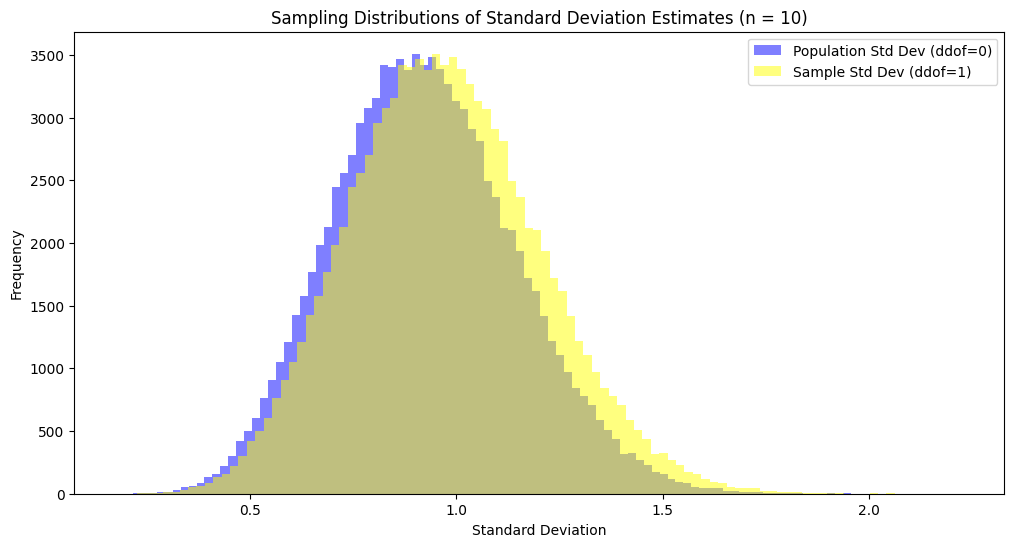

In [5]:
# The first step is to generate 100,000 samples of size 10 from the standard normal distribution using NumPy's random.normal function.
data = np.random.normal(size=(100000, 10))

# We compute the Standard deviation with ddof=0 , an biased estimator for the population standard deviation.
std_population = np.std(data, axis=1, ddof=0)
# We compute the Standard deviation with ddof=1, an unbiased estimator for the population standard deviation.
std_sample = np.std(data, axis=1, ddof=1)

# Next, we plot histograms of both sets of standard deviations to visually compare them.
plt.figure(figsize=(12, 6))
plt.hist(std_population, bins=100, alpha=0.5, label='Population Std Dev (ddof=0)', color='blue')
plt.hist(std_sample, bins=100, alpha=0.5, label='Sample Std Dev (ddof=1)', color='yellow')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Sampling Distributions of Standard Deviation Estimates (n = 10)')
plt.show()

# Discussion on the Results


In the histogram , we observe that the two bell-shaped curves overlap each other heavily, the difference is notable in the shift of the peaks. Both distributions are centered around 1, which is the true standard deviation of the standard normal distribution.  However, the distribution of the standard deviations calculated with `ddof=1` (sample standard deviation) is slightly shifted to the right compared to those calculated with `ddof=0` (population standard deviation) is slightly shifted to the left. 
The `ddof=0` distribution slightly shifted left shows the histogram peaks at around 0.95, showing that this estimator tends to underestimate the true standard deviation when the sample size is small. 
The `ddof=1` distributions are centred closer to 1, this is an unbiased estimator, because dividing by n-1 corrects for the lost degree of freedom when the sample mean is estimated.
As discussed earlier, the `ddof` argument determines how many degrees of freedom are subtracted in the denominator when  computing the standard deviation. Because the sample mean removes one degree of freedom, the `ddof=1` estimator divides by n-1 and therefore produces slightly larger and more accurate estimates than `ddof=0`, which divides by n. The histograms above illustrate this difference.
These results are consistent with the empirical rule for normal distributions. Since we sampled from a standard normal distribution with a true standard deviation of 1, we expect most values to fall within one standard deviation of the mean. Therefore, the "true" spread of the population should be centred near 1, the histogram confirms this: the unbiased estimator `ddof=1` peaks almost exactly at1, while the biased estimator `ddof=0` is shifted to the left. this provides empirical evidence that the `ddof=1` estimator better reflects the true spread of the underlying population when the sample size is small.

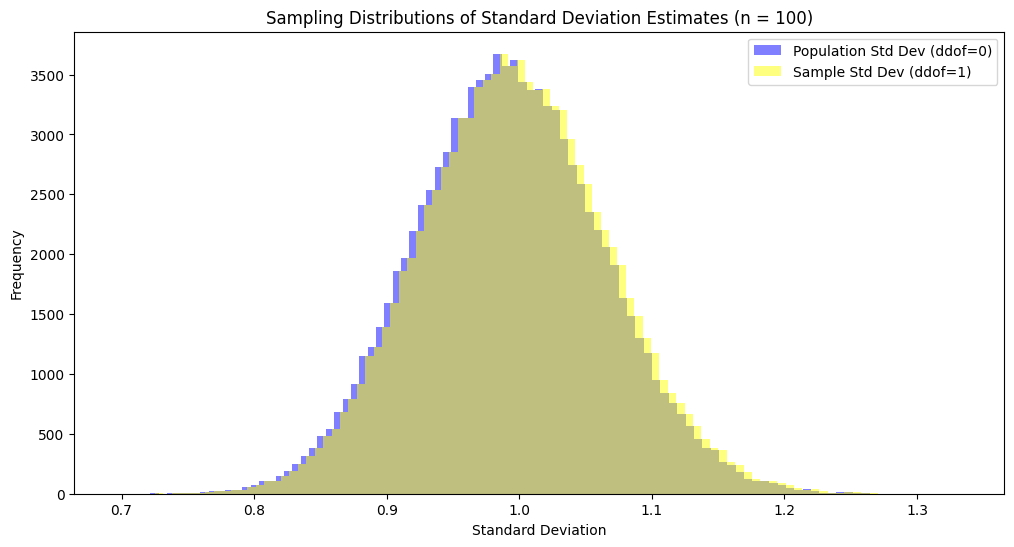

In [9]:
# We look at how this changes with larger sample sizes by repeating the process for samples of size 100.
# The easist way to demonstrate this is to repeat the simulation with a larger sample size.   

data2 = np.random.normal(size=(100000, 100))
# We compute the Standard deviation with ddof=0 , an biased estimator for the population standard deviation.
std_pop_n100 = np.std(data2, axis=1, ddof=0)
# We compute the Standard deviation with ddof=1, an unbiased estimator for the population standard deviation.
std_sample_n100 = np.std(data2, axis=1, ddof=1)
# Next, we plot histograms of both sets of standard deviations to visually compare them.
plt.figure(figsize=(12, 6))
plt.hist(std_pop_n100, bins=100, alpha=0.5, label='Population Std Dev (ddof=0)', color='blue')
plt.hist(std_sample_n100, bins=100, alpha=0.5, label='Sample Std Dev (ddof=1)', color='yellow')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Sampling Distributions of Standard Deviation Estimates (n = 100)')
plt.show()

# Discussion

When the sample size increase to n = 100, the histograms nearly overlap each other. The sampling distributions for `ddof=0` and `ddof=1` and the peaks seem nearly identical. For larger sample sizes, this confirms that dividing by n or n-1 produce a very similar result. Using a bias of `ddof=0` is only really noticeable in a small sample. The height of the histogram bars increases also, the frequency changes from approximately 3000 using sample size 10 to 3500 using sample size 100. When the data is tightly clustered, more values fall into fewer bins. We notice in the original plot, when n = 10, the standard distributions spread across many bins, frequencies were lower at around a maximum of 3200. When n = 100, the standard distributions fall into a narrower band, some bins are  more crowded because frequencies increase with a maximum of 3600. 

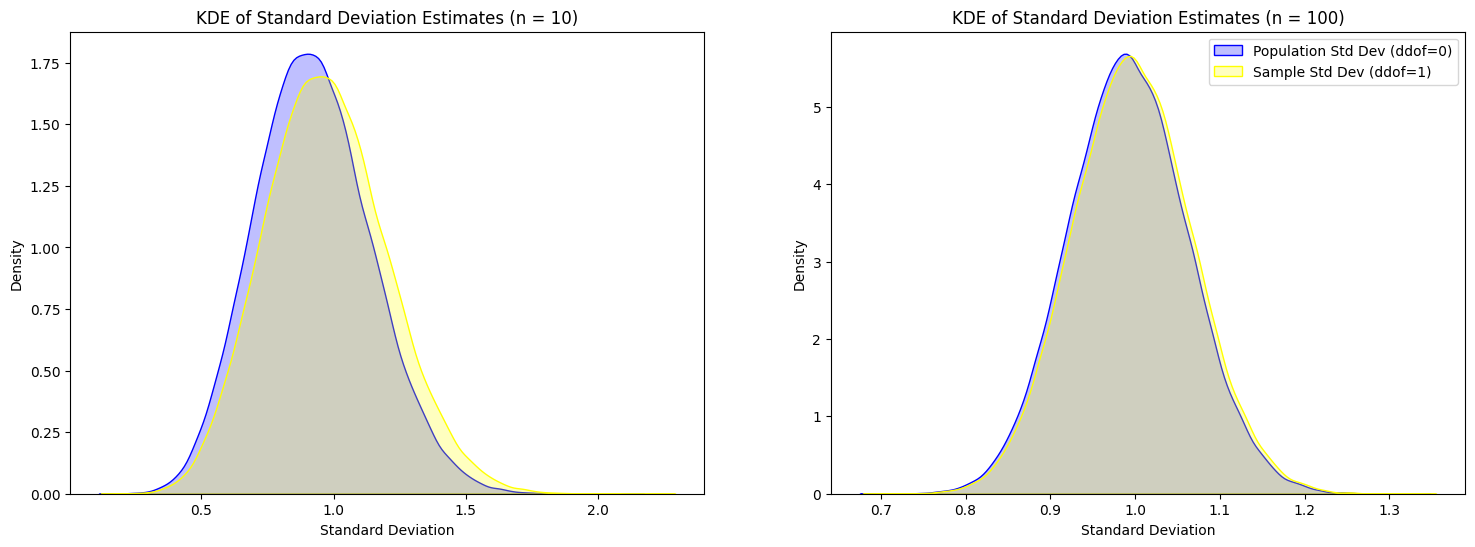

<Figure size 640x480 with 0 Axes>

In [10]:
# In this section, I create another plot to show the two distributions side by side for better comparison.
# I use seaborn's kdeplot function to create kernel density estimates (KDEs) for both sets of standard deviations.


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Plot for n = 10
sns.kdeplot(std_population, ax=axes[0], color='blue', label='Population Std Dev (ddof=0)', fill=True)
sns.kdeplot(std_sample, ax=axes[0], color='yellow', label='Sample Std Dev (ddof=1)', fill=True)
axes[0].set_title('KDE of Standard Deviation Estimates (n = 10)')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Density')

# Plot for n = 100
sns.kdeplot(std_pop_n100, ax=axes[1], color='blue', label='Population Std Dev (ddof=0)', fill=True)
sns.kdeplot(std_sample_n100, ax=axes[1], color='yellow', label='Sample Std Dev (ddof=1)', fill=True)
axes[1].set_title('KDE of Standard Deviation Estimates (n = 100)')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Density')

plt.legend()
plt.show()
plt.tight_layout()



# Discussion KDE

[KDE](https://www.geeksforgeeks.org/data-science/seaborn-kdeplot-a-comprehensive-guide/)
The Kernal Density Estimate plot is used above to estimate the probability density function of continuous data. It provides a smooth estimate of the sampling distribution of the standard deviation, the y-axis represents density rather than frequency which was demonstrated by the histograms. As a result 
The Kernal Density Estimate plot is used above to estimate the probability density function of continuous data. It provides a smooth estimate of the sampling distribution of the standard deviation, the y-axis represents density rather than frequency which was demonstrated by the histograms. The total area under  each KDE curve is equal to 1. As a result, narrow distributions appear taller, a narrow distribution should have a higher peak in order for the area to remain 1.For the smaller sample size(n=1), the KDE curves are wider and the peak of the curve is at around 1.75. This reflects larger variability in smaller deviation estimates from smaller samples, and it also shows that the ddof=0 estimator is slightly shifted left. For the larger samples size(n=100), the KDE curves are narrower and the peak rises to around 5.5. When the sample size increse, the standard deviation estimates become more stable and concentrated around the true value of 1. These like they nearly perfectly overlap each other and the differences become almost negligible.

In [11]:
# Add in another table comparing the means and variances of the two different sample sizes to show how they converge as sample size increases.
# Change labels and colours to make it clearer 

## Problem 3: t-Tests

In this problem, I will explore how Type II errors behave when comparing two samples of size 100, one from a standard normal distribution, N(0,1) and one from a normal distribution, whose mean is shifted by a value d. For eachvalue of d, I repeatedly draw new samples and perform an independent samples t-test, and record how often the test fails to reject the null hypothesis. This allows us to examine how the Type II error rate changes as the true mean difference increases

Again , in this experiment , we look at the null hypothesis. The null hypothesis is that there is no real difference between the groups.
$$
H_0 : \mu_1 = \mu_2
$$
where $$ H_0 $$ is the null hypothesis and $$ \mu_1 $$ represents the true population mean of group A(drawm from the standard normal distribution where the true mean is 0) and $$ \mu_2 $$ represents the true population of groub b(drawn from a normal distribution with mean d , so it true mean is d). We choose a paramater for d, and let it take different values. When d = 0 , both samples come from identical distribution, but as d increases , we expect the populations to become more separated.

[Type II Error](https://corporatefinanceinstitute.com/resources/data-science/type-ii-error/#:~:text=%22False%20negative%22%20error,Increase%20the%20sample%20size) - In hypothesis testinad , a type II error is a situation where a hypothesis test failes to reject the null hypothesis even though it is false. It is also known as a false negative. An example in real life would be, if you were to test someone for diabetes and they were incorrectly diagnosed as not having diabetes when they actually have it , the danger being they are not being treated for an illness that they have. In this problem so the test misses a real effect or difference. In this problems, the Type II error refers to failing to reject the null hypothesis that the two populations are equal, even though a true difference in mean exists. This rate will be high when the true difference is small.

In [14]:
# Set up the parameters 

n =100 # This is the sample size in each group
n_simulations  = 1000 # This is the number of simulations
np. random.seed(42) # Set seed for reproducibility

d_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # Different mean values to test 

results = [] # Empty list to store the results d an its false negative rate

for d in d_values: # Loop over each effect size d
    false_negatives = 0 # Counter for false negatives
    for i in range(n_simulations): # Loop over the number of simulation, repeate the experiment for each effect size d
        # Group A taken from standard normal distribution where location(mean)=0 and scale=1 and sample size n=100
        group_A = np.random.normal(loc=0, scale=1, size=n)
    
        # Group B taken from normal distribution where location=d and scale=1 and sample size n=100
        group_B = np.random.normal(loc=d, scale=1, size=n)
    
        # Perform a two-sample t-test
        t_stat, p_value = stats.ttest_ind(group_A, group_B)
        # Check if the test fails to reject the null hypothesis (p-value > 0.05)
        if p_value > 0.05:
            false_negatives += 1
    # Calculate the false negative rate(Type II error), the number of time we fail to reject the null hypothesis divided by the total number of simulations
    false_negative_rate = false_negatives / n_simulations
    # Print the 
    print(f"Effect Size (d): {d}, False Negative Rate: {false_negative_rate:.4f}")
    # Store the results
    results.append((d, false_negative_rate))
# Print the results in a formatted table
print(f"{'Effect Size (d)':<15}{'False Negative Rate':<20}")
for d, false_negative_rate in results:
    print(f"{d:<15}{false_negative_rate:<20.4f}")

Effect Size (d): 0.0, False Negative Rate: 0.9400
Effect Size (d): 0.1, False Negative Rate: 0.9040
Effect Size (d): 0.2, False Negative Rate: 0.6950
Effect Size (d): 0.3, False Negative Rate: 0.4500
Effect Size (d): 0.4, False Negative Rate: 0.1770
Effect Size (d): 0.5, False Negative Rate: 0.0640
Effect Size (d): 0.6, False Negative Rate: 0.0180
Effect Size (d): 0.7, False Negative Rate: 0.0010
Effect Size (d): 0.8, False Negative Rate: 0.0000
Effect Size (d): 0.9, False Negative Rate: 0.0000
Effect Size (d): 1.0, False Negative Rate: 0.0000
Effect Size (d)False Negative Rate 
0.0            0.9400              
0.1            0.9040              
0.2            0.6950              
0.3            0.4500              
0.4            0.1770              
0.5            0.0640              
0.6            0.0180              
0.7            0.0010              
0.8            0.0000              
0.9            0.0000              
1.0            0.0000              


![abacus](img/statistics.jpg)

-----------------------------------
# END

